# Space of parameters study

In this notebook, we study the space of parameters necessary for the construction of quantum feature maps. Namely, we focus on the `paulis` and `entanglement` parameters, and are interested in ways to identify combinations redundancies which must be eliminated from the full space of parameters combinations.


__________

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

from qsvm_utils import *

________

### Study of combinations of feature map parameters

For the grid/random search approach, we must determine which parameters will be tested. However, not all combinations must be considering, given that some of them, despite being different, will yield precisely the same feature map!

There "redundancies" are very important to be taken into consideration, so that we can disregard them and considerably reduce the number of possible combinations!

Let's now identify such redundancies, first for the $n=2$ qubits case, then for $n>=3$.



(1, ['Y'], 'linear')


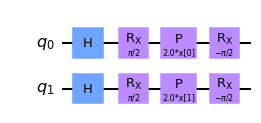



(1, ['Y'], 'circular')


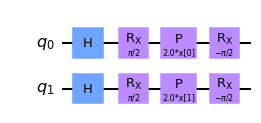



(1, ['Y'], 'full')


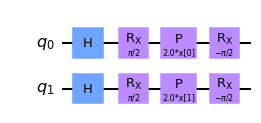



(1, ['Y'], 'sca')


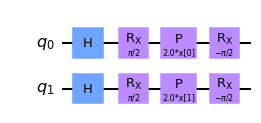



(1, ['Y', 'XZ'], 'linear')


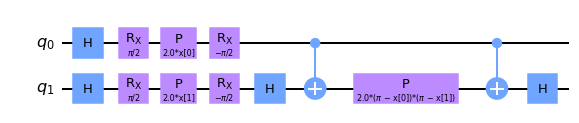



(1, ['Y', 'XZ'], 'circular')


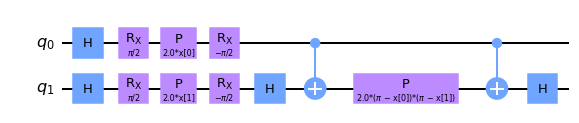



(1, ['Y', 'XZ'], 'full')


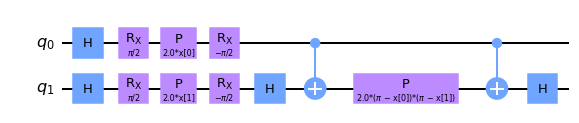



(1, ['Y', 'XZ'], 'sca')


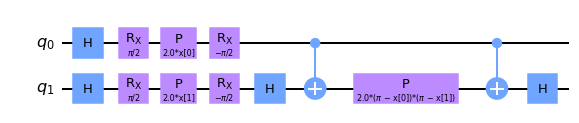



(1, ['XY', 'XZ'], 'linear')


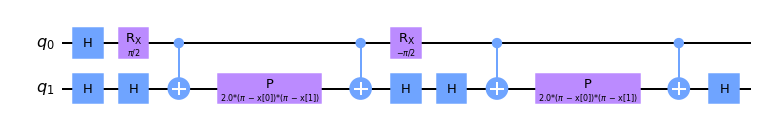



(1, ['XY', 'XZ'], 'circular')


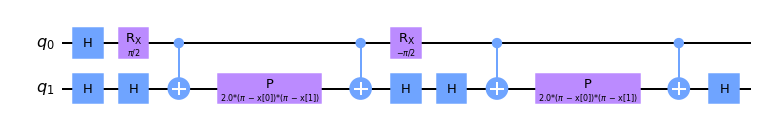



(1, ['XY', 'XZ'], 'full')


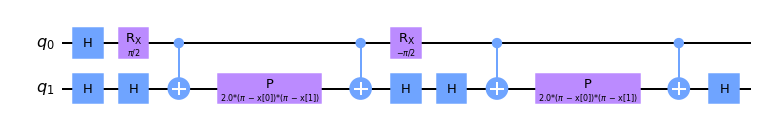



(1, ['XY', 'XZ'], 'sca')


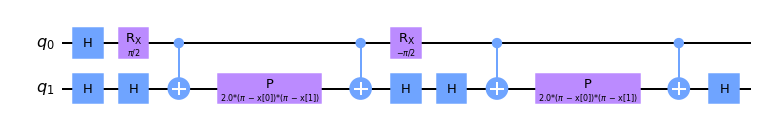

In [3]:
# random matrix with 2 columns

X = np.random.randint(0, 100, size=(20, 2))

feature_dim = X.shape[1]

reps = [1]
paulis = [["Y"], ["Y", "XZ"], ["XY", "XZ"]]
entanglement = "linear circular full sca".split()

for item in list(product(reps, paulis, entanglement)):
    
    feature_map = PauliFeatureMap(feature_dimension=feature_dim,
                                  reps=item[0],
                                  paulis=item[1],
                                  entanglement=item[2])

    print("\n")
    print(item)
    show_figure(feature_map.decompose().draw("mpl"))

**Conclusion**: for 2 qubits, "entanglement" parameter has no effect whatsoever. Thus, only "linear" entanglement may be considered for $n=2$.

___________________



(1, ['Y', 'XZ', 'ZZ'], 'linear')


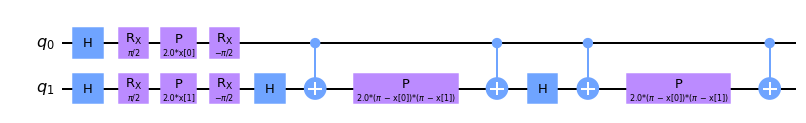



(1, ['XY', 'XXZ'], 'linear')


ValueError: The number of block qubits must be smaller or equal to the number of qubits in the circuit.

In [4]:
X = np.random.randint(0, 100, size=(20, 2))

feature_dim = X.shape[1]

reps = [1]
paulis = [["Y", "XZ", "ZZ"], ["XY", "XXZ"]]
entanglement = ["linear"]

for item in list(product(reps, paulis, entanglement)):
    
    feature_map = PauliFeatureMap(feature_dimension=feature_dim,
                                  reps=item[0],
                                  paulis=item[1],
                                  entanglement=item[2])

    print("\n")
    print(item)
    show_figure(feature_map.decompose().draw("mpl"))

**Conclusion**: the number of paulis in the list is arbitrary, but each pauli string must be made up of at most the number of qubits, which makes perfect sense!
___________________

In [ ]:
X = np.random.randint(0, 100, size=(20, 2))

feature_dim = X.shape[1]

reps = [1]
paulis = [["X", "X"], ["X", "Y"], ["Y", "X"], ["Y", "XZ"], ["XZ", "Y"]]
entanglement = ["linear"]

for item in list(product(reps, paulis, entanglement)):
    
    feature_map = PauliFeatureMap(feature_dimension=feature_dim,
                                  reps=item[0],
                                  paulis=item[1],
                                  entanglement=item[2])

    print("\n")
    print(item)
    show_figure(feature_map.decompose().draw("mpl"))

**Conclusion**: As well as the order of the paulis in each string, the order of the strings in the list also matters!

___________________

Now, let's look at more than 2 qubits!



(1, ['Y'], 'linear')


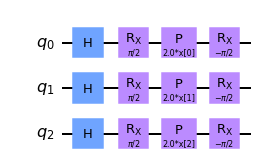



(1, ['Y'], 'circular')


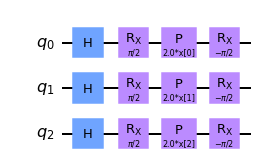



(1, ['Y'], 'sca')


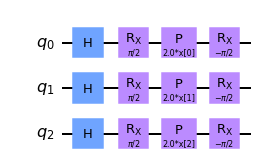



(1, ['Y'], 'full')


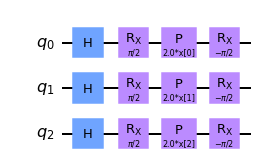



(1, ['Y', 'XZ'], 'linear')


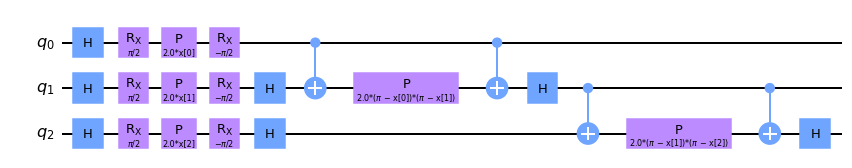



(1, ['Y', 'XZ'], 'circular')


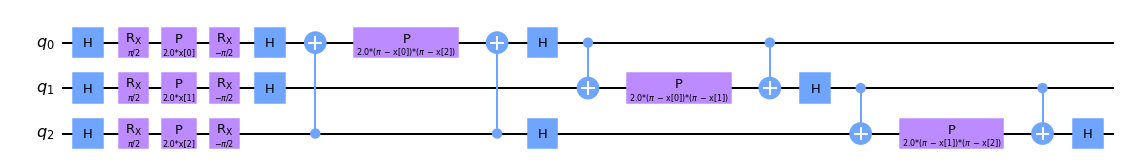



(1, ['Y', 'XZ'], 'sca')


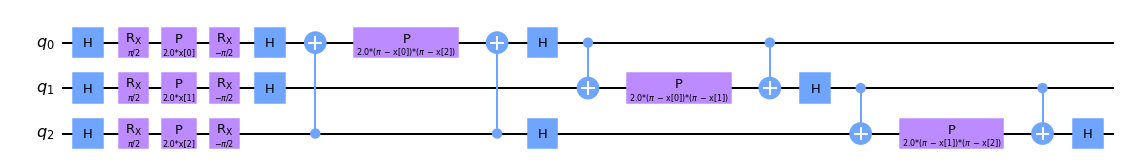



(1, ['Y', 'XZ'], 'full')


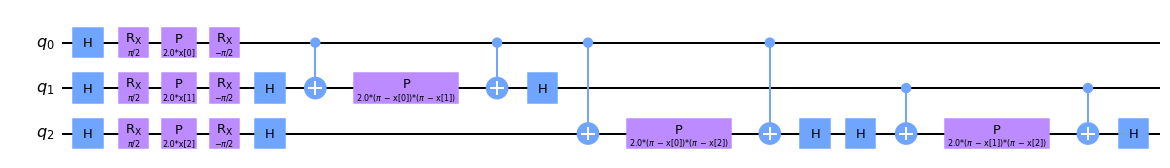



(1, ['XY', 'XZ'], 'linear')


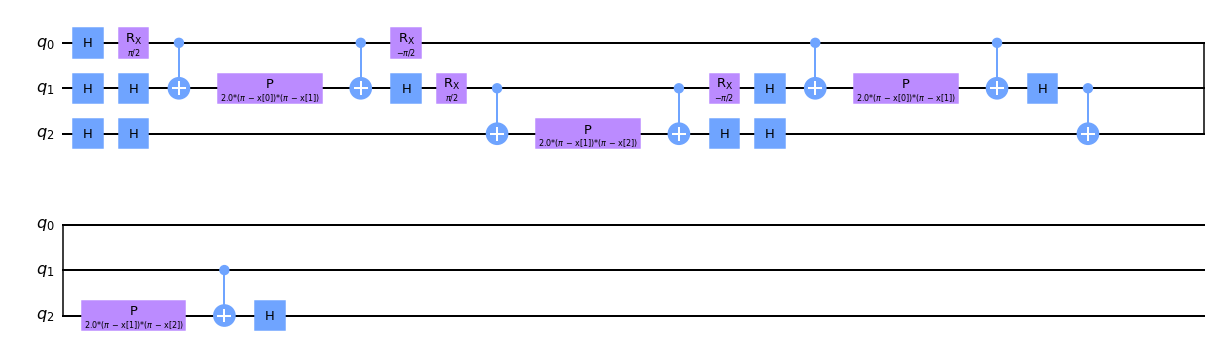



(1, ['XY', 'XZ'], 'circular')


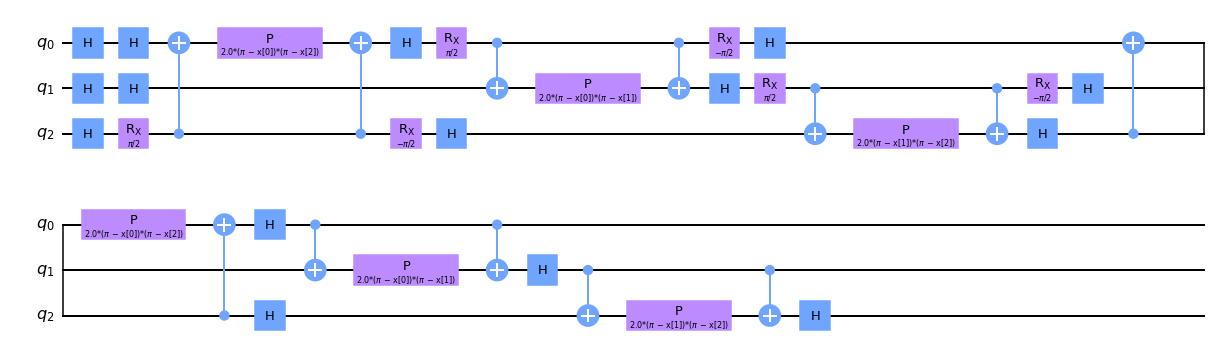



(1, ['XY', 'XZ'], 'sca')


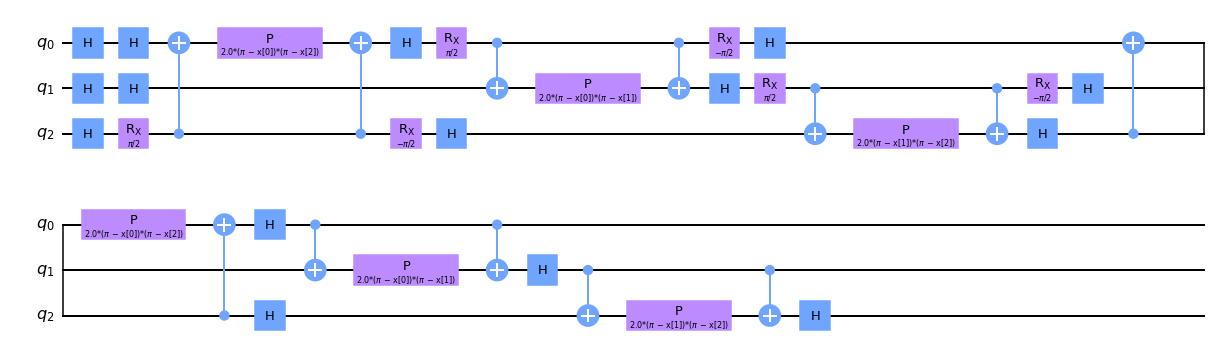



(1, ['XY', 'XZ'], 'full')


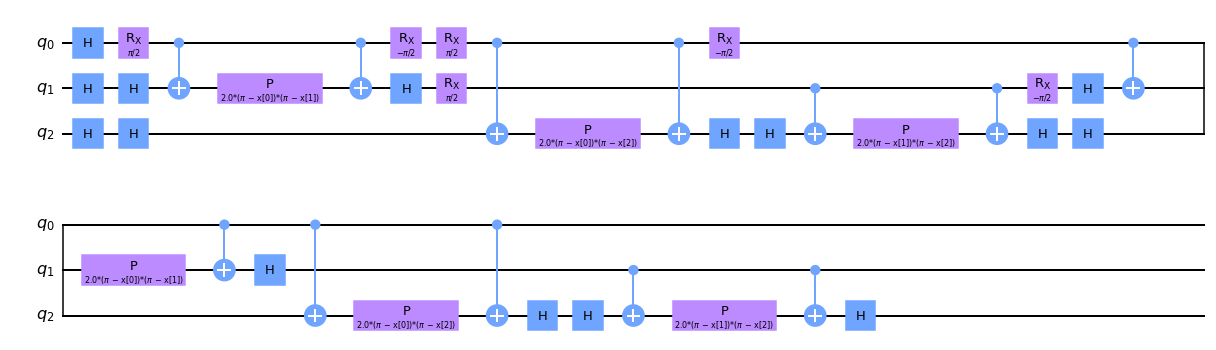



(1, ['Z', 'XZY'], 'linear')


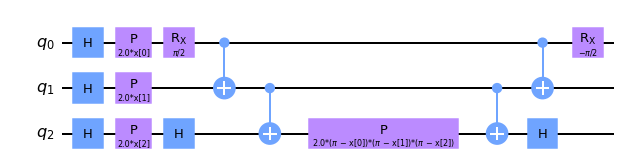



(1, ['Z', 'XZY'], 'circular')


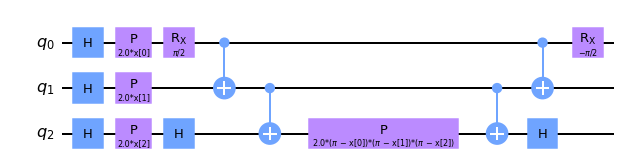



(1, ['Z', 'XZY'], 'sca')


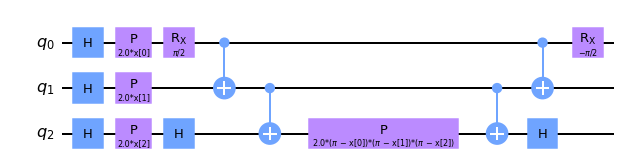



(1, ['Z', 'XZY'], 'full')


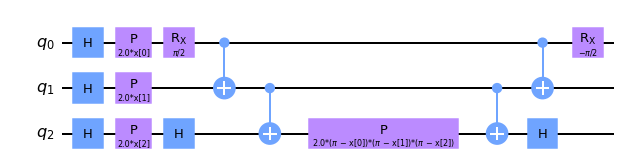



(1, ['YZ', 'XZY'], 'linear')


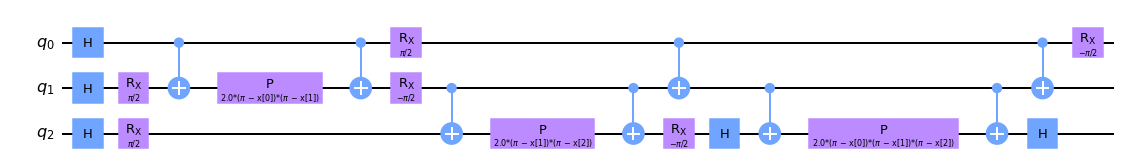



(1, ['YZ', 'XZY'], 'circular')


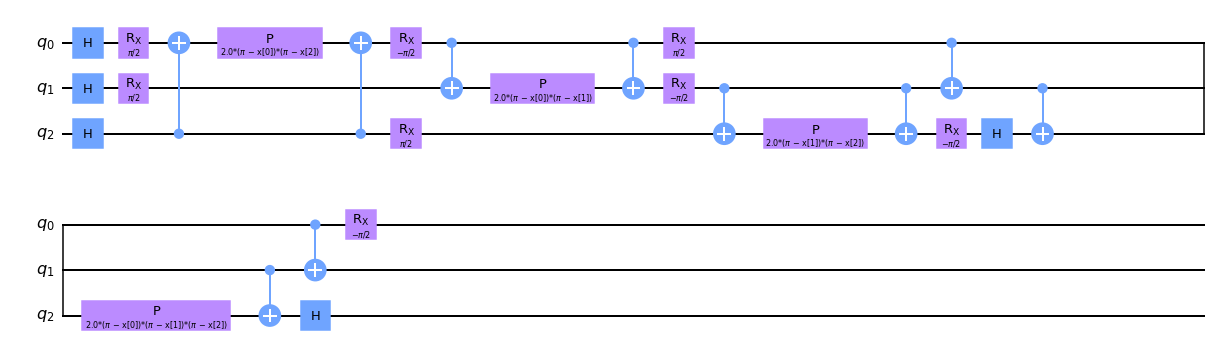



(1, ['YZ', 'XZY'], 'sca')


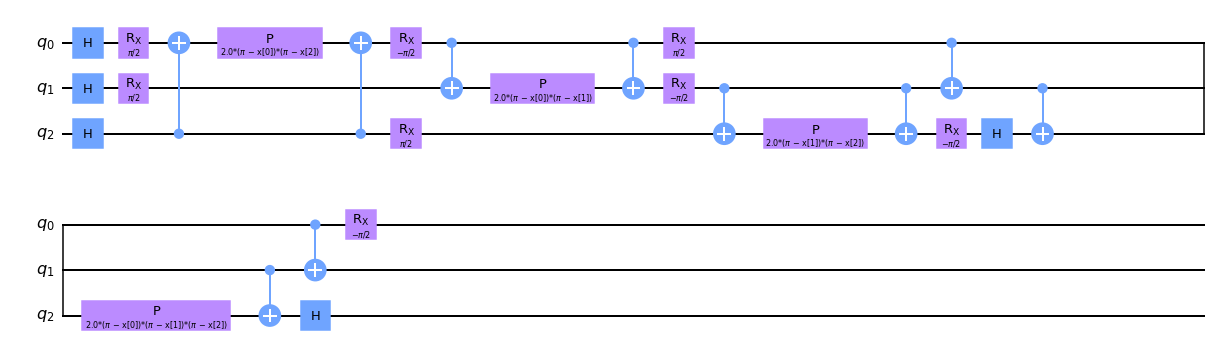



(1, ['YZ', 'XZY'], 'full')


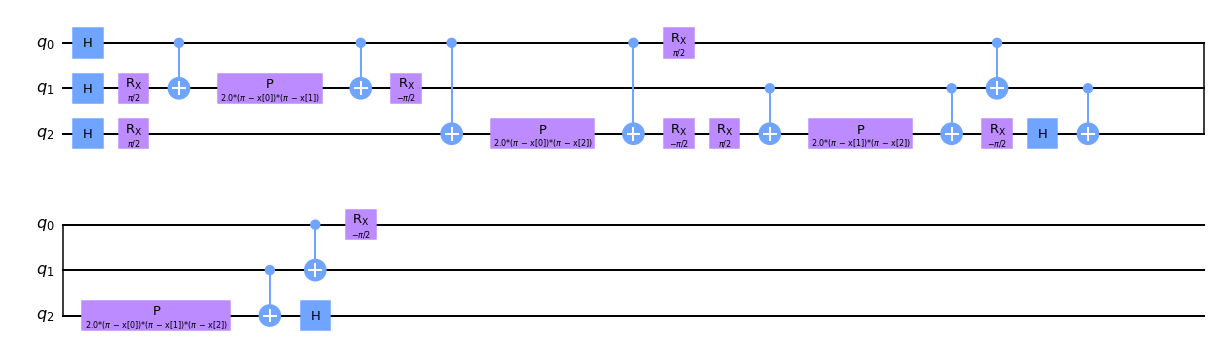

In [5]:
# random matrix with 2 columns

X = np.random.randint(0, 100, size=(20, 3))

feature_dim = X.shape[1]

reps = [1]
paulis = [["Y"], ["Y", "XZ"], ["XY", "XZ"], ["Z", "XZY"], ["YZ", "XZY"]]
entanglement = "linear circular sca full".split()

for item in list(product(reps, paulis, entanglement)):
    
    feature_map = PauliFeatureMap(feature_dimension=feature_dim,
                                  reps=item[0],
                                  paulis=item[1],
                                  entanglement=item[2])

    print("\n")
    print(item)
    show_figure(feature_map.decompose().draw("mpl"))



(1, ['Y'], 'linear')


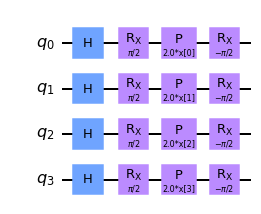



(1, ['Y'], 'circular')


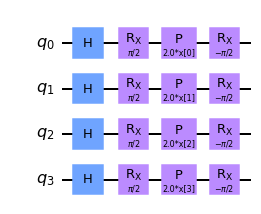



(1, ['Y'], 'sca')


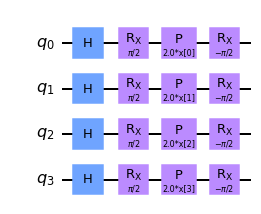



(1, ['Y'], 'full')


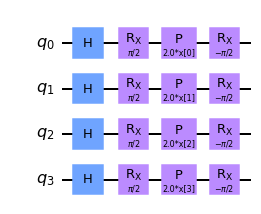



(1, ['Y', 'XZ'], 'linear')


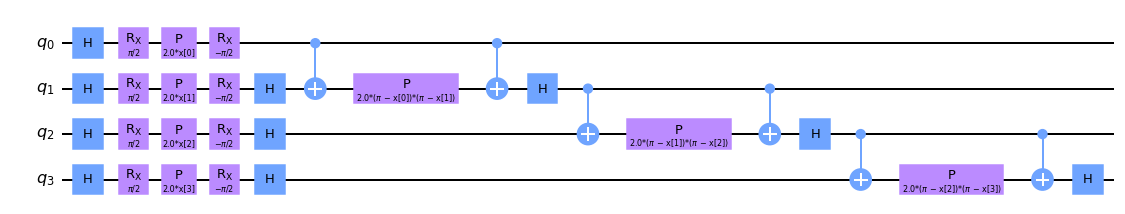



(1, ['Y', 'XZ'], 'circular')


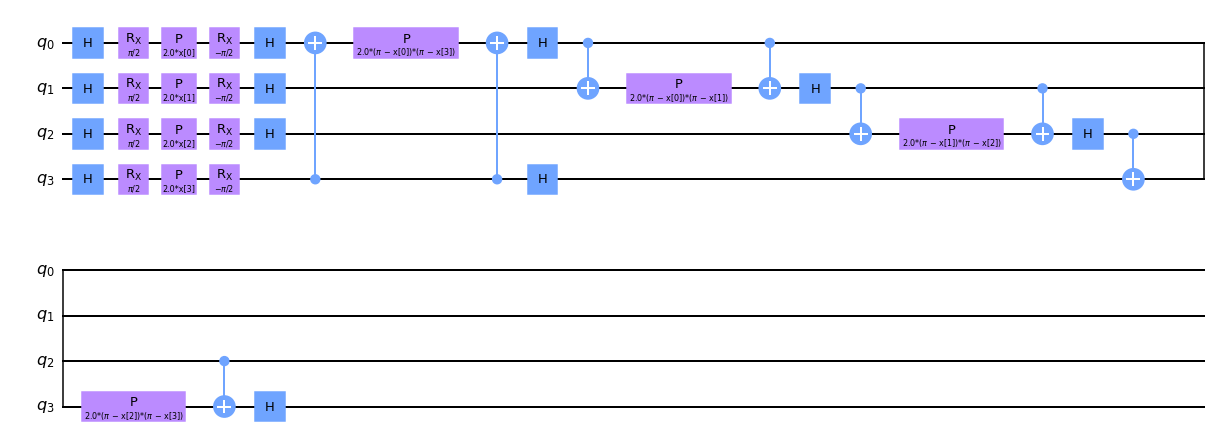



(1, ['Y', 'XZ'], 'sca')


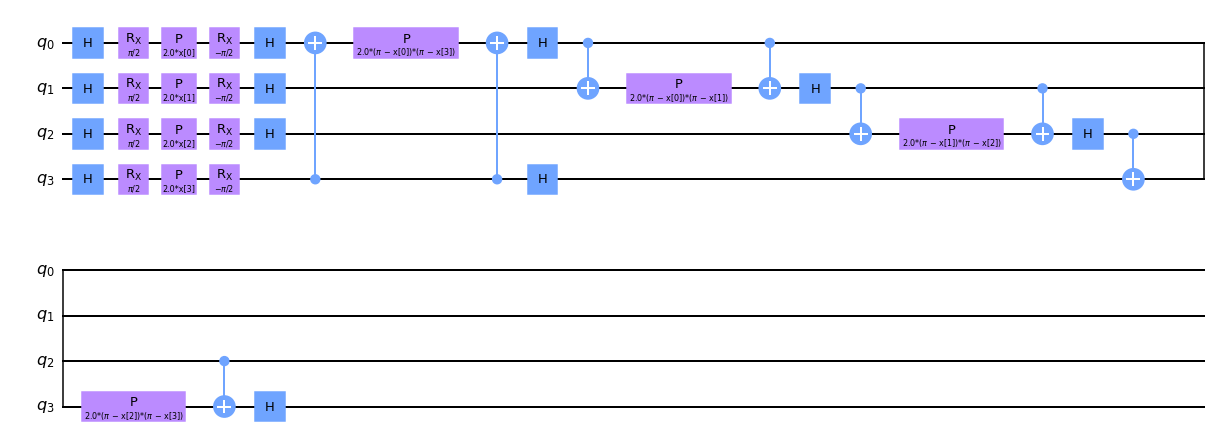



(1, ['Y', 'XZ'], 'full')


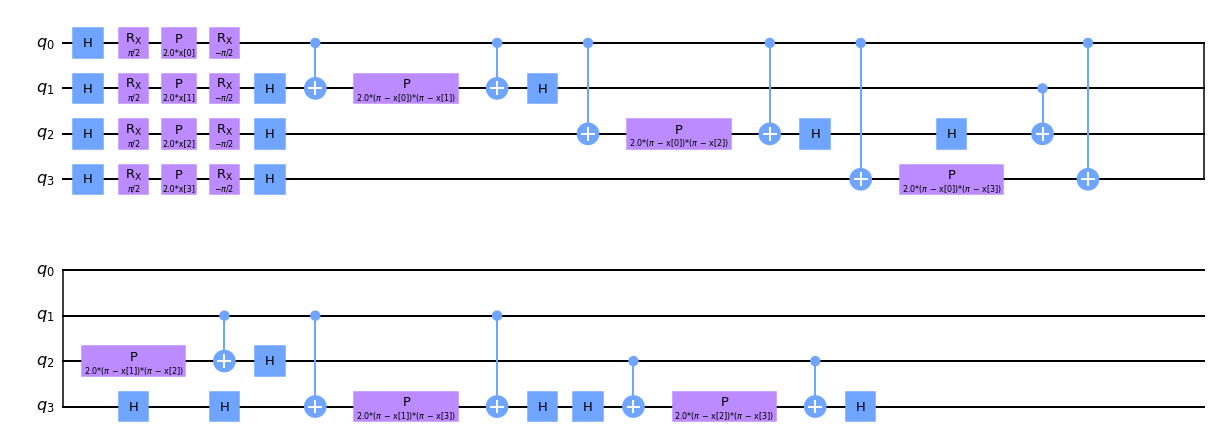



(1, ['XY', 'XZ'], 'linear')


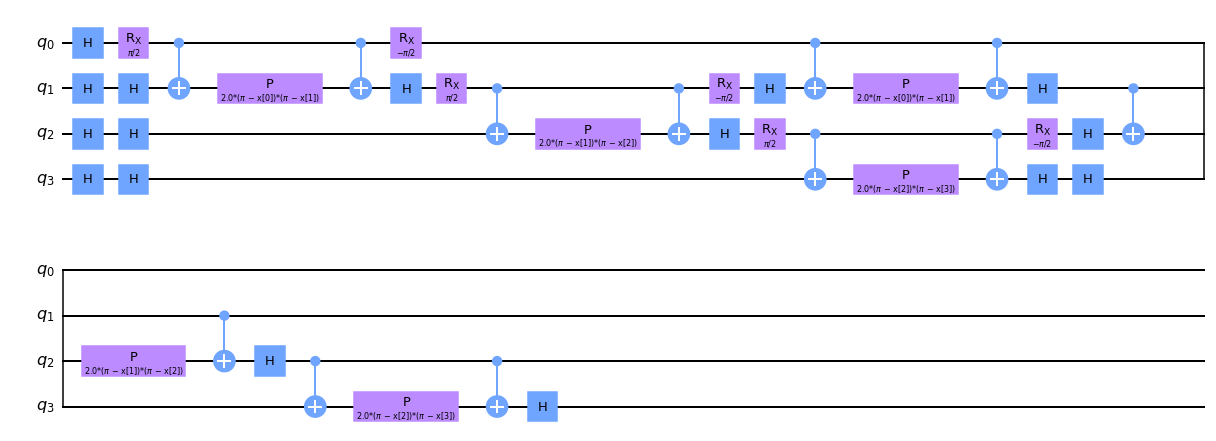



(1, ['XY', 'XZ'], 'circular')


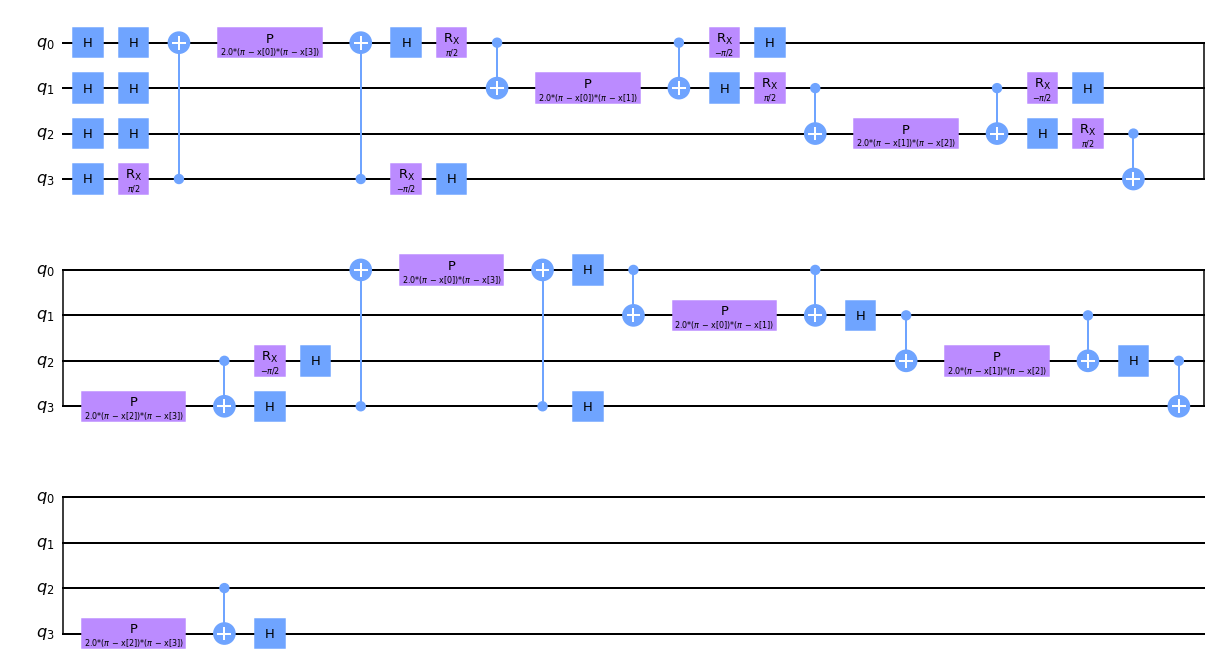



(1, ['XY', 'XZ'], 'sca')


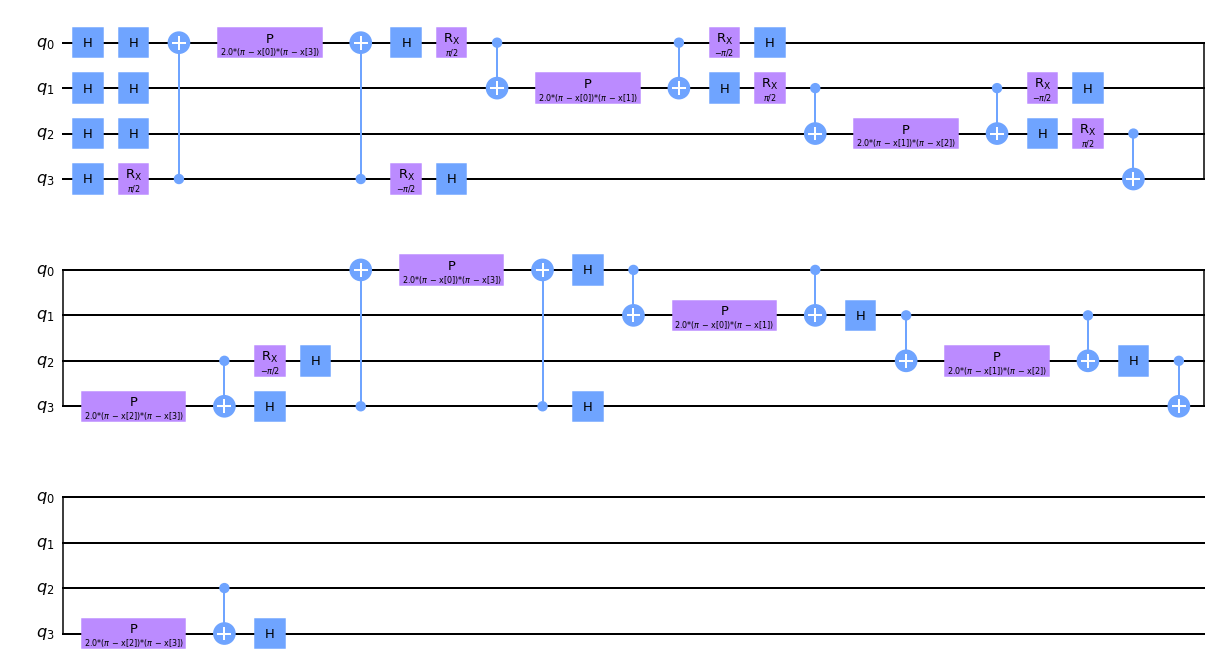



(1, ['XY', 'XZ'], 'full')


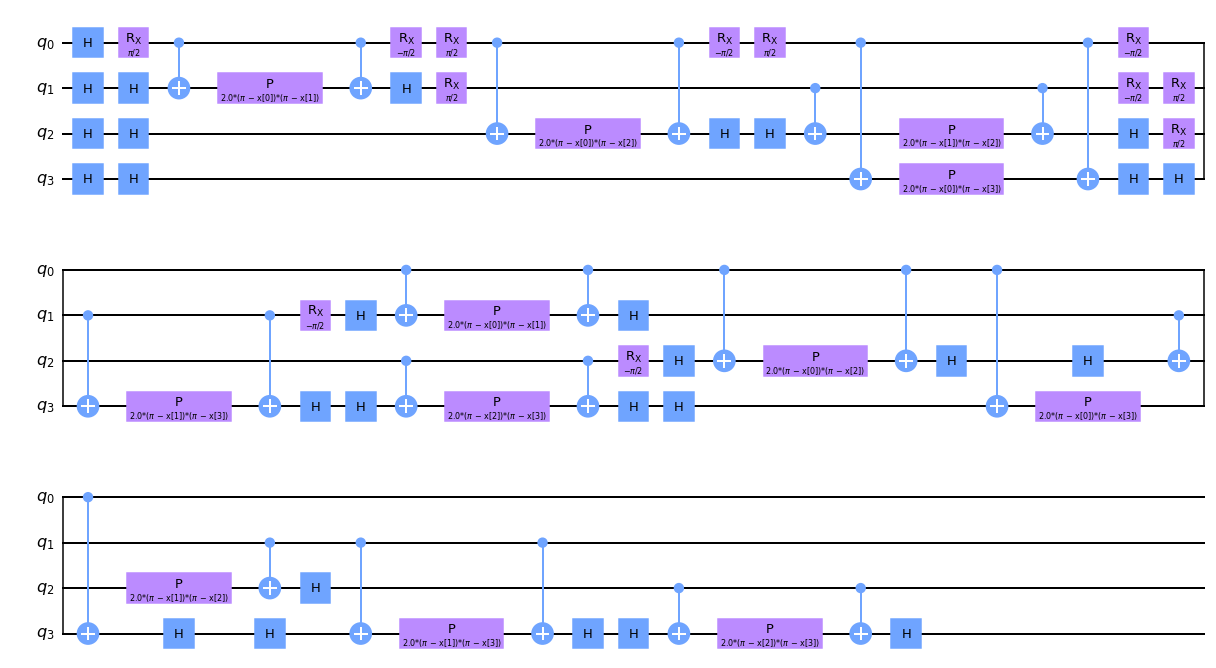



(1, ['Z', 'XZY'], 'linear')


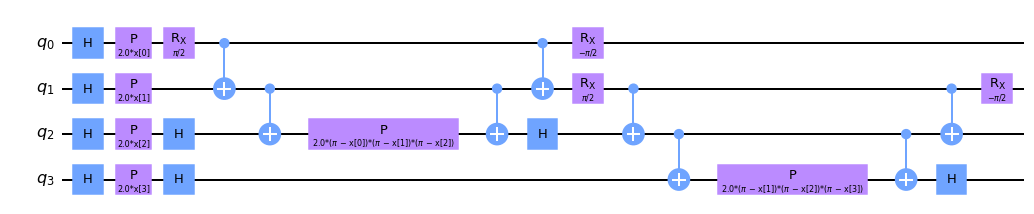



(1, ['Z', 'XZY'], 'circular')


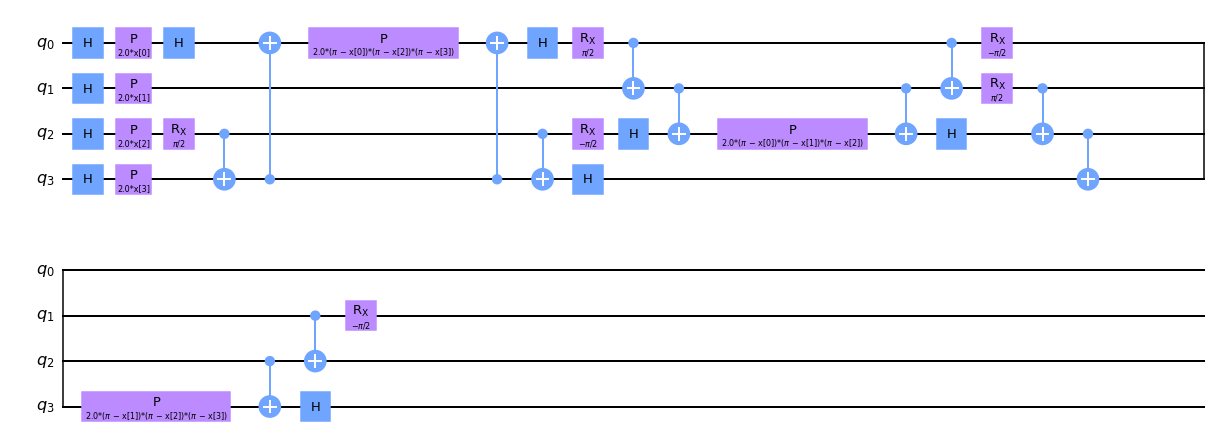



(1, ['Z', 'XZY'], 'sca')


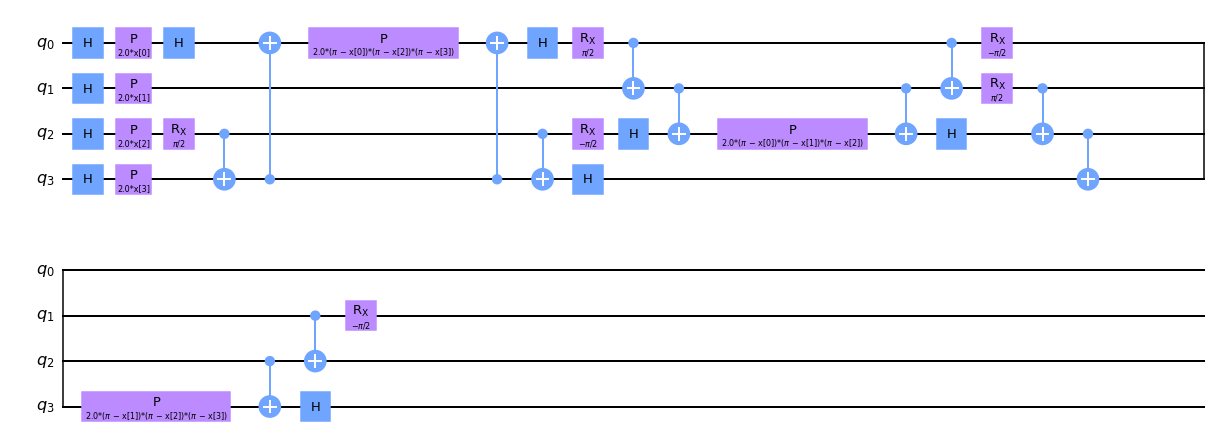



(1, ['Z', 'XZY'], 'full')


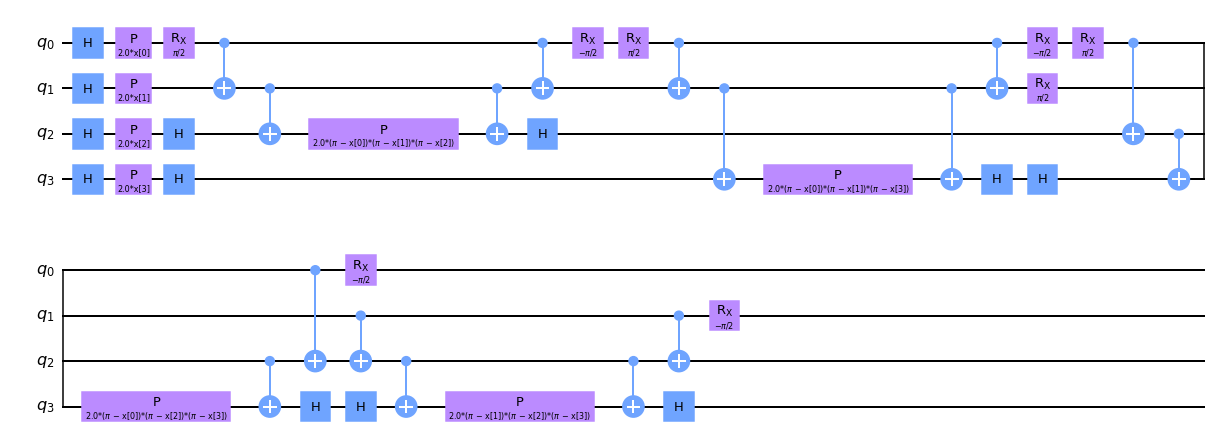



(1, ['YZ', 'XZY'], 'linear')


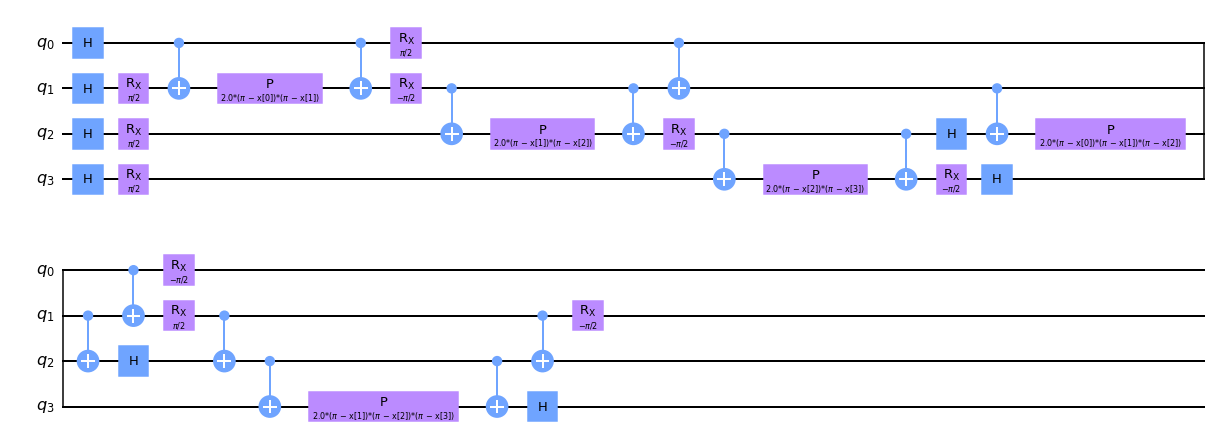



(1, ['YZ', 'XZY'], 'circular')


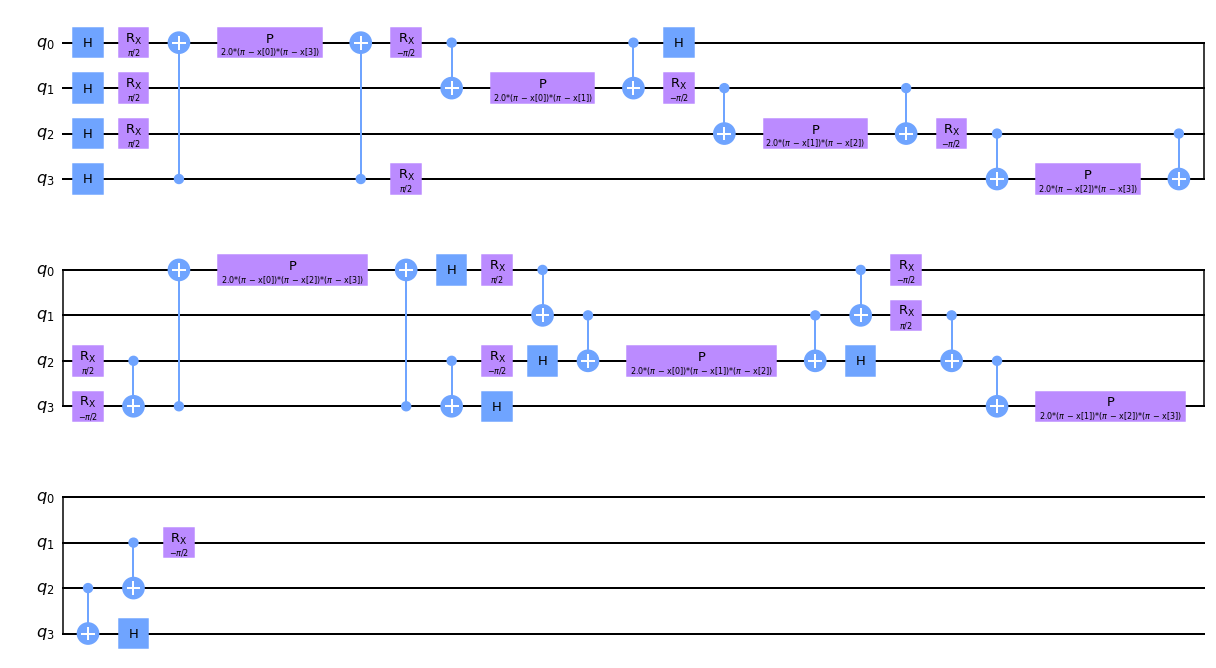



(1, ['YZ', 'XZY'], 'sca')


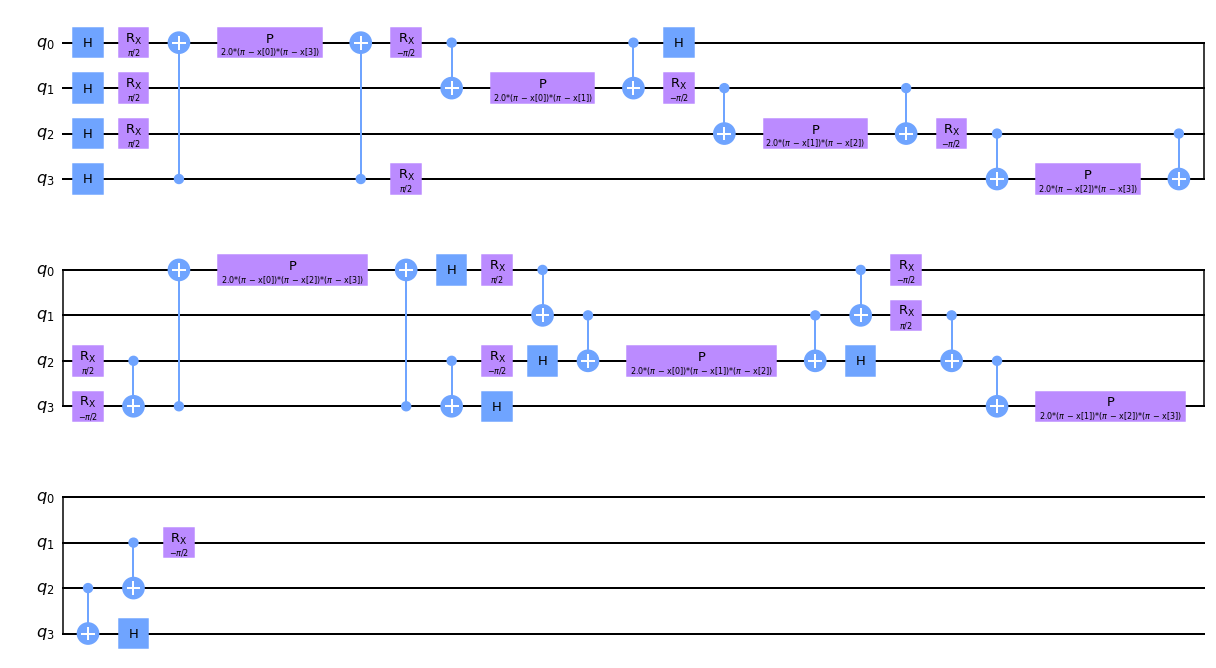



(1, ['YZ', 'XZY'], 'full')


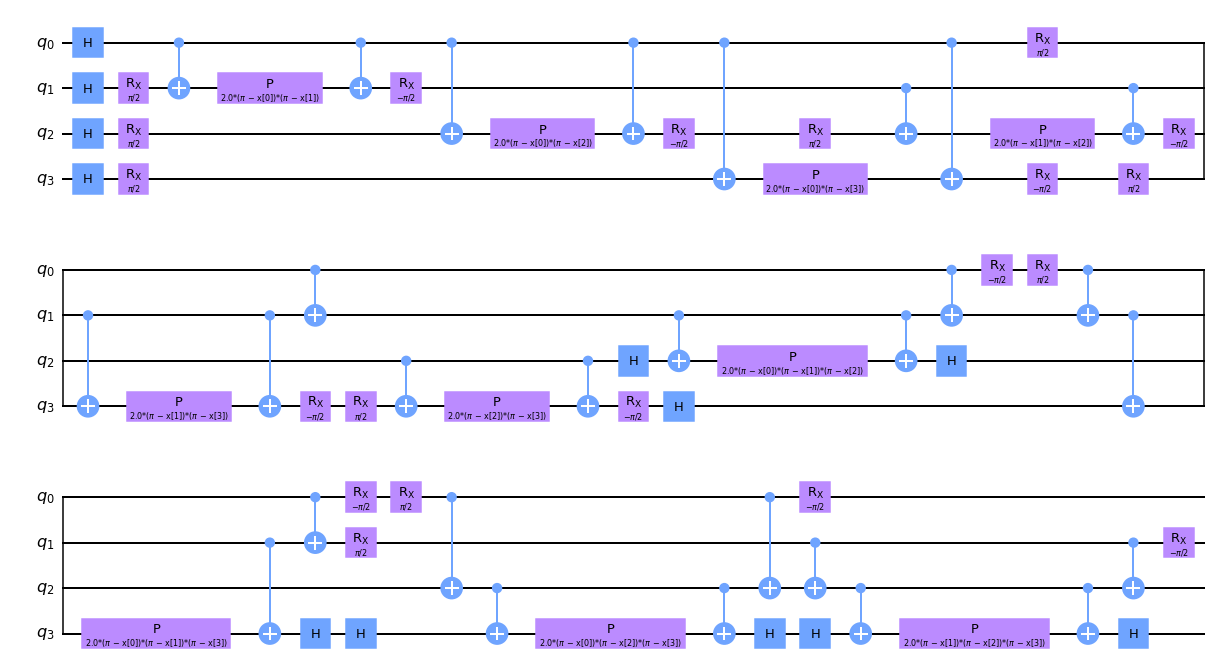

In [6]:
# random matrix with 2 columns

X = np.random.randint(0, 100, size=(20, 4))

feature_dim = X.shape[1]

reps = [1]
paulis = [["Y"], ["Y", "XZ"], ["XY", "XZ"], ["Z", "XZY"], ["YZ", "XZY"]]
entanglement = "linear circular sca full".split()

for item in list(product(reps, paulis, entanglement)):
    
    feature_map = PauliFeatureMap(feature_dimension=feature_dim,
                                  reps=item[0],
                                  paulis=item[1],
                                  entanglement=item[2])

    print("\n")
    print(item)
    show_figure(feature_map.decompose().draw("mpl"))

**Conclusion**: When only single-qubit paulis are considered ("X", "Y" or "Z"), entanglement estrategies have no action. Therefore, the param grid can be reduced quite a lot, by considering only "linear" entanglemet in such cases (eg, for "paulis_list" such as ["X", "Y"], ["Z"], etc.).

Also, notice how "sca" strategy is exactly the same as "circular" here.

Indeed, that shouldn't be the case, in general. Looking in the [NLocal source code](https://qiskit.org/documentation/_modules/qiskit/circuit/library/n_local/n_local.html#NLocal), there should be a difference, given an offset which is not 0. Unfortunately, the offset can't be changed directly in the PauliFeatureMap class, which is probably the reason why "sca" coincides with "circular". Now, it's probably possible to incorporate NLocal into PauliFeatureMap in order to accommodate "sca". However, this won't be done here -- instead, we shall simply disregard "sca" (after all, if it was considered, we would have to consider also the tuning of the offset, which would induce extra complexity).
___________________

________